<a href="https://colab.research.google.com/github/ramin-nouri/sunram/blob/main/finalversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Motivation Behind Selecting Solar Panel Detection Using Aerial Imagery for Sustainable Energy Mapping"

Choosing to focus on detecting solar panels using aerial imagery for this project stems from a deep appreciation for both the technological and environmental implications of renewable energy sources. Solar energy, as a clean and abundant source of power, plays a pivotal role in combating climate change and reducing our dependence on fossil fuels. However, maximizing its impact requires efficient methods for identifying and mapping solar installations across diverse geographic areas. This is where our project comes into play.

The decision to utilize high-resolution satellite images from the Swiss Federal Office of Topography (swisstopo) was driven by the need for accurate and detailed data that could enhance the precision of our detection models. Swisstopo's SwissImage 10 dataset offers a unique opportunity to work with up-to-date, detailed aerial imagery covering Switzerland's diverse landscapes. Such rich data allows us to tackle the challenges of identifying solar panels in varying environments, from urban areas with compact rooftops to rural settings with standalone installations.

By leveraging this dataset, our project aims to contribute valuable insights into the spatial distribution of solar energy resources, aiding policymakers, urban planners, and energy companies in making informed decisions. Furthermore, this work has the potential to inspire similar initiatives globally, supporting the broader adoption of solar energy and contributing to sustainability goals.

In essence, the choice of this subject reflects a commitment to using cutting-edge technology to address pressing environmental issues. It embodies a hope that through diligent research and innovative application of deep learning, we can uncover insights that propel us toward a more sustainable and renewable energy-powered future.

For our project on detecting solar panels from the sky, we found the perfect dataset from the Swiss Federal Office of Topography, swisstopo, which offers detailed, high-resolution satellite images of Switzerland. These images provide a clear view of the country's varied landscapes, from urban rooftops to remote areas, making them ideal for identifying solar panels.

Downloading and preparing this dataset was our first big step. We carefully selected the most relevant images, cleaned them up to remove any distortions, and then divided them into two sets: one for training our detection model and another for evaluating its performance. The goal was to tailor the dataset precisely for our deep learning tools, ensuring each image was ready to help us uncover the solar panels hidden in plain sight.

This process turned our dataset into a finely tuned resource, ready to guide our model in learning and recognizing solar installations across Switzerland's diverse terrain.

In [1]:
!pip install fastai ipywidgets gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.2 MB/s 

In [2]:
!pip install nest_asyncio


In [3]:
!pip install imagecodecs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 6.7 MB/s eta 0:00:00


In [4]:
from fastai.vision.all import *
from fastdownload import download_url

1. **Loading URLs**: Using `pandas`, the script loads a CSV file located at `/content/zurich.csv` into a DataFrame. This CSV file contains URLs to images that are presumably aerial shots relevant to our project. The DataFrame is structured to have a single column named 'url', which lists these image URLs. These URLs are then converted into a list for easy iteration.

2. **Setting Up Image Downloading and Compression**:
- Additional libraries `requests` and `PIL` (Python Imaging Library, accessed through `Image`) are imported. `requests` is used for web requests to download images from the URLs, while `PIL` is used for image processing tasks.
- A function, `download_and_compress_image`, is defined to handle the downloading and compression of images. This function takes an image URL, downloads the image, resizes it to a target size of 224x224 pixels (a common size for input into many deep learning models), and compresses it with a specified quality level (default is 85 out of 100, balancing quality and file size). The compressed image is then converted into a byte array, making it ready for use in memory without needing to save and reload the image from disk.

3. **Executing the Download and Compression**:
- A list comprehension is used to apply the `download_and_compress_image` function to each URL in the `image_urls` list. This effectively downloads and compresses each image referenced in the CSV file. The resulting compressed images are stored in a list named `compressed_images`.

This code efficiently handles the initial stage of data preparation for image-based machine learning projects. By downloading and compressing images, it prepares a dataset of uniform size and format, which is crucial for consistent model training and evaluation.

In [5]:
import pandas as pd

# Load URLs from the CSV file
csv_file_path = '/content/zurich.csv'
url_df = pd.read_csv(csv_file_path, header=None, names=['url'])
image_urls = url_df['url'].tolist()


In [6]:
import requests
from PIL import Image
from io import BytesIO

def download_and_compress_image(url, target_size=(224, 224), quality=85):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img = img.resize(target_size)
        img_byte_arr = BytesIO()
        img.save(img_byte_arr, format='JPEG', quality=quality)
        img_byte_arr = img_byte_arr.getvalue()
        return img_byte_arr
    except Exception as e:
        print(f"Error downloading or compressing {url}: {e}")
        return None

# Download and compress images
compressed_images = [download_and_compress_image(url) for url in image_urls]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [7]:
import os

# Directory to save images
save_dir = '/mnt/data/compressed_images'
os.makedirs(save_dir, exist_ok=True)

# Save images to the directory
for idx, img_data in enumerate(compressed_images):
    if img_data is not None:
        file_name = os.path.join(save_dir, f'image_{idx}.jpeg')
        with open(file_name, 'wb') as img_file:
            img_file.write(img_data)


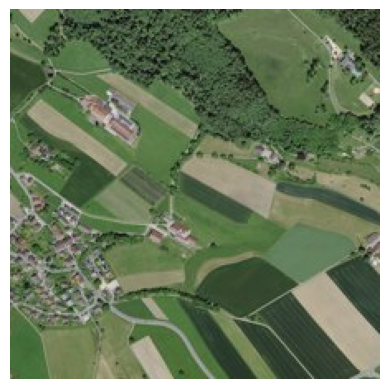

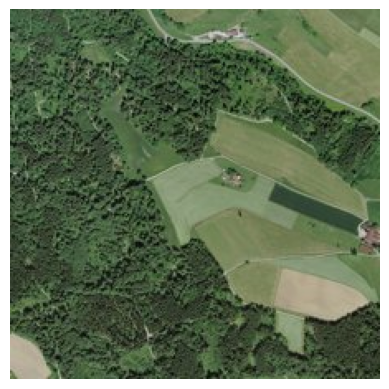

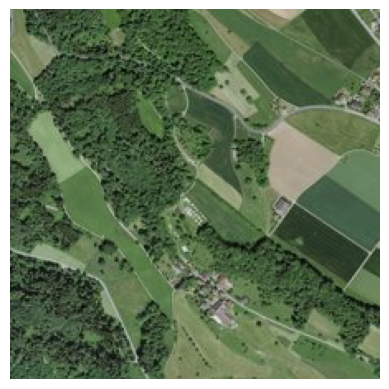

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and display an image
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display the first few images
for i in range(3):
    display_image(f'/mnt/data/compressed_images/image_{i}.jpeg')


# Labeling
1. **Setting Up Environment**: It starts by importing necessary libraries: `zipfile` for working with ZIP files and `os` for interacting with the operating system, such as creating directories and listing files.

2. **Preparing for Extraction**: The script defines paths for the ZIP file (`/content/labled.zip`) and the target directory (`/content/extracted_images`) where the contents will be extracted. It then ensures the extraction directory exists, creating it if necessary.

3. **Extracting ZIP File**: Using the `zipfile` library, the script opens the ZIP file in read mode and extracts all its contents into the specified extraction directory. A message is printed upon successful completion.

4. **Organizing Extracted Files**: The script then categorizes the extracted files into raw images and their corresponding label images based on their filenames. It assumes label images have filenames ending with `_label.bmp`. Lists named `raw_images` and `label_images` are populated with the respective filenames.

5. **Verification**: Finally, it prints the first few filenames from both lists to verify that the extraction and categorization processes have been completed successfully.

This process efficiently prepares the dataset by extracting images from a compressed file and organizing them for further processing or analysis, such as training a machine learning model with labeled data.

In [9]:
import zipfile
import os

# Path to the ZIP file and the directory where you want to extract it
zip_file_path = '/content/labled.zip'
extraction_directory = '/content/extracted_images'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

print("Extraction Completed.")


Extraction Completed.


In [10]:
# List the first few files in the extraction directory
extracted_files = os.listdir(extraction_directory)
print("Extracted files:", extracted_files[:5])


Extracted files: ['PV01_325123_1204229.bmp', 'PV01_325199_1204170.bmp', 'PV01_325412_1205370_label.bmp', 'PV01_325563_1204534_label.bmp', 'PV01_325326_1205380.bmp']


In [11]:
import os

# Directory containing the extracted images
image_directory = '/content/extracted_images'

# Separating the raw images and their corresponding labels
raw_images = []
label_images = []

for filename in os.listdir(image_directory):
    if filename.endswith('_label.bmp'):
        label_images.append(filename)
    else:
        raw_images.append(filename)

# Just to verify
print("Raw images:", raw_images[:5])
print("Label images:", label_images[:5])


Raw images: ['PV01_325123_1204229.bmp', 'PV01_325199_1204170.bmp', 'PV01_325326_1205380.bmp', 'PV01_325331_1205372.bmp', 'PV01_325334_1203789.bmp']
Label images: ['PV01_325412_1205370_label.bmp', 'PV01_325563_1204534_label.bmp', 'PV01_325194_1204251_label.bmp', 'PV01_324972_1203801_label.bmp', 'PV01_325206_1204181_label.bmp']


# Data Augmentation:
Setting up an image data generator for data augmentation using TensorFlow's ImageDataGenerator. This technique is crucial for increasing the diversity of the training dataset without the need for additional images, thereby enhancing the model's ability to generalize. The specified augmentations include rotations up to 90 degrees, width and height shifts, horizontal and vertical flips, and brightness adjustments. This step enriches the dataset by creating varied versions of the original images, which helps prevent overfitting and improves model robustness.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2]
)


# Preprocessing Images for Model Input:
This part focuses on preprocessing images to prepare them for model training. It involves loading images from a directory, converting them to arrays, and normalizing their pixel values to the [0, 1] range. This normalization is a common practice in deep learning as it helps in speeding up the training process and achieving better performance. The function preprocess_image is applied to both raw images and their corresponding labels, preparing them as inputs for the model. This step ensures that all images are of a uniform size and scale, which is necessary for consistent processing by the neural network.



In [13]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def preprocess_image(image_path, target_size=(224, 224)):
    image = img_to_array(load_img(image_path, target_size=target_size)) / 255.0
    return image

# Assuming extraction_directory is correctly set
preprocessed_images = [preprocess_image(os.path.join(extraction_directory, img)) for img in raw_images]
preprocessed_labels = [preprocess_image(os.path.join(extraction_directory, lbl)) for lbl in label_images]


# Splitting Data and Building the U-Net Model:

**Splitting Data:** It uses train_test_split from sklearn to divide the preprocessed images and labels into training, validation, and test sets. This separation allows for the evaluation of the model's performance on unseen data, providing insights into its ability to generalize.

**Building the U-Net Model:** The U-Net architecture is defined, which is widely used for image segmentation tasks. The U-Net model consists of a contracting path to capture context and a symmetric expanding path that enables precise localization. This structure makes U-Net particularly suitable for tasks like segmenting solar panels in aerial images. The model is compiled with the Adam optimizer and binary cross-entropy loss, preparing it for training.
Each of these steps is crucial for developing a deep learning model for image segmentation. Data augmentation enhances the dataset, preprocessing standardizes the input data, data splitting enables effective training and validation, and building the U-Net model lays the foundation for learning complex patterns in the data.







In [14]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(
    preprocessed_images, preprocessed_labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.25, random_state=42)


In [15]:
  from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
  from tensorflow.keras.models import Model

  def unet_model(input_size=(224, 224, 3)):
      inputs = Input(input_size)

      # Contracting Path (Downsampling)
      c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
      c1 = Dropout(0.1)(c1)
      c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
      p1 = MaxPooling2D((2, 2))(c1)

      c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
      c2 = Dropout(0.1)(c2)
      c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
      p2 = MaxPooling2D((2, 2))(c2)

      c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
      c3 = Dropout(0.2)(c3)
      c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
      p3 = MaxPooling2D((2, 2))(c3)

      c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
      c4 = Dropout(0.2)(c4)
      c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
      p4 = MaxPooling2D(pool_size=(2, 2))(c4)

      # Bottleneck
      c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
      c5 = Dropout(0.3)(c5)
      c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

      # Expansive Path (Upsampling)
      u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
      u6 = concatenate([u6, c4])
      c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
      c6 = Dropout(0.2)(c6)
      c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

      u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
      u7 = concatenate([u7, c3])
      c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
      c7 = Dropout(0.2)(c7)
      c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

      u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
      u8 = concatenate([u8, c2])
      c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
      c8 = Dropout(0.1)(c8)
      c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

      u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
      u9 = concatenate([u9, c1], axis=3)
      c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
      c9 = Dropout(0.1)(c9)
      c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

      outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

      model = Model(inputs=[inputs], outputs=[outputs])
      return model

  # Instantiate and compile the model
  model = unet_model()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
import numpy as np

def preprocess_label(image_path, target_size=(224, 224)):
    image = img_to_array(load_img(image_path, target_size=target_size, color_mode='grayscale')) / 255.0
    return image

preprocessed_labels = np.array([preprocess_label(os.path.join(extraction_directory, f)) for f in label_images])
print("Label shape:", preprocessed_labels.shape)  # This should output (num_samples, 224, 224, 1)


Label shape: (665, 224, 224, 1)


In [17]:

train_images, val_images, train_labels, val_labels = train_test_split(
    preprocessed_images, preprocessed_labels, test_size=0.25, random_state=42)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create image data augmentation generators
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit methods
seed = 1
image_datagen.fit(train_images, augment=True, seed=seed)
mask_datagen.fit(train_labels, augment=True, seed=seed)


In [19]:
print(f"Number of training images: {len(train_images)}")


Number of training images: 498


In [20]:
batch_size = 32
steps_per_epoch = max(1, len(train_images) // batch_size)
print(f"Steps per epoch: {steps_per_epoch}")


Steps per epoch: 15


In [21]:
print(f"Number of training images: {len(train_images)}")
print(f"Number of training labels: {len(train_labels)}")


Number of training images: 498
Number of training labels: 498


In [22]:

train_images = np.array(train_images)
train_labels = np.array(train_labels)

print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)


Shape of train_images: (498, 224, 224, 3)
Shape of train_labels: (498, 224, 224, 1)


In [23]:
batch_size = 5  # or 3
steps_per_epoch = max(1, len(train_images) // batch_size)
print(f"Batch size: {batch_size}, Steps per epoch: {steps_per_epoch}")


Batch size: 5, Steps per epoch: 99


In [24]:
val_images = np.array(val_images)
val_labels = np.array(val_labels)


In [25]:
print(f"Number of validation images: {len(val_images)}")
print(f"Number of validation labels: {len(val_labels)}")


Number of validation images: 167
Number of validation labels: 167


In [26]:
val_images = np.array(val_images)
val_labels = np.array(val_labels)

print("Shape of val_images:", val_images.shape)
print("Shape of val_labels:", val_labels.shape)


Shape of val_images: (167, 224, 224, 3)
Shape of val_labels: (167, 224, 224, 1)



# Model training
Model traning process, where a deep learning model is fitted to the training data with the application of data augmentation, and its performance is validated using a separate validation dataset. Below is a detailed documentation for this part:

# Model Training with Data Augmentation
Purpose: To train the model on augmented image data for better generalization and to evaluate its performance on a validation set that was not seen during the training process.

# Method:

The model.fit method is used to train the model over a specified number of epochs. This method takes both training and validation data, along with other parameters that control the training process.

In [28]:
history = model.fit(
    image_datagen.flow(train_images, train_labels, batch_size=batch_size, seed=seed),
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=(val_images, val_labels)
)


Epoch 1/10
99/99 [==============================] - 11s 106ms/step - loss: 0.5570 - accuracy: 0.7039 - val_loss: 0.5645 - val_accuracy: 0.6974
Epoch 2/10
99/99 [==============================] - 10s 96ms/step - loss: 0.5560 - accuracy: 0.7060 - val_loss: 0.5618 - val_accuracy: 0.6974
Epoch 3/10
99/99 [==============================] - 9s 87ms/step - loss: 0.5539 - accuracy: 0.7059 - val_loss: 0.5644 - val_accuracy: 0.6974
Epoch 4/10
99/99 [==============================] - 9s 93ms/step - loss: 0.5552 - accuracy: 0.7050 - val_loss: 0.5625 - val_accuracy: 0.6974
Epoch 5/10
99/99 [==============================] - 9s 92ms/step - loss: 0.5571 - accuracy: 0.7030 - val_loss: 0.5616 - val_accuracy: 0.6974
Epoch 6/10
99/99 [==============================] - 9s 91ms/step - loss: 0.5544 - accuracy: 0.7060 - val_loss: 0.5620 - val_accuracy: 0.6974
Epoch 7/10
99/99 [==============================] - 9s 90ms/step - loss: 0.5569 - accuracy: 0.7041 - val_loss: 0.5617 - val_accuracy: 0.6974
Epoch 8/10

In [29]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)


Shape of test_images: (133, 224, 224, 3)
Shape of test_labels: (133, 224, 224, 3)


In [30]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


5/5 [==============================] - 1s 79ms/step - loss: 0.5576 - accuracy: 0.7019
Test Loss: 0.5576086640357971, Test Accuracy: 0.7019079327583313


In [31]:
model.save('my_model.h5')  # Saves the model for future use


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



# Visualizing Model Training and Validation Metrics
Objective:
 To create visual representations of the model's training and validation accuracy and loss across epochs, facilitating the evaluation of the model's learning performance and generalization capability.

# Implementation Steps:

# Plot Training and Validation Accuracy:

The plt.plot function from the matplotlib.pyplot library is used to plot the training accuracy (history.history['accuracy']) and validation accuracy (history.history['val_accuracy']) as a function of the epoch number.
Labels are assigned to each plot for clarity, with 'Training Accuracy' and 'Validation Accuracy' indicating the type of data each line represents.
The plot is titled 'Model Accuracy' to indicate the metric being visualized, and both axes are labeled appropriately ('Epoch' for the x-axis and 'Accuracy' for the y-axis).
A legend is added to help distinguish between the two lines representing training and validation accuracy.
# Plot Training and Validation Loss:

Similarly, another plot is generated for the training loss (history.history['loss']) and validation loss (history.history['val_loss']).
Each line is labeled accordingly, and the plot is titled 'Model Loss' to reflect the metric being visualized.
The axes are labeled 'Epoch' (x-axis) and 'Loss' (y-axis), providing context for the data points plotted.
A legend is included to differentiate between training and validation loss lines.


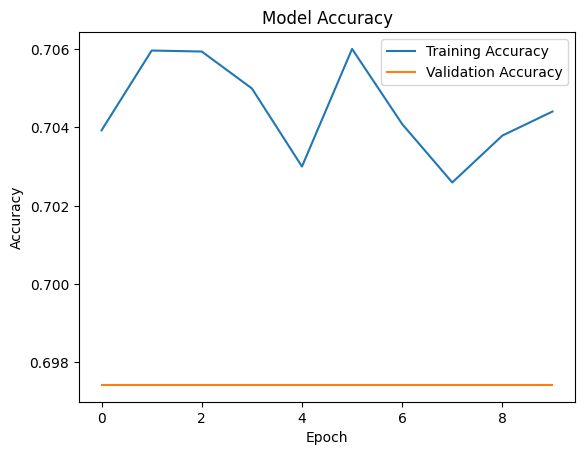

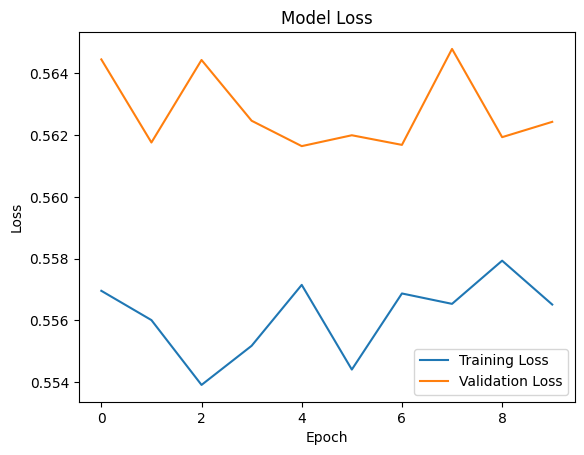

In [32]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


1/1 [==============================] - 1s 945ms/step


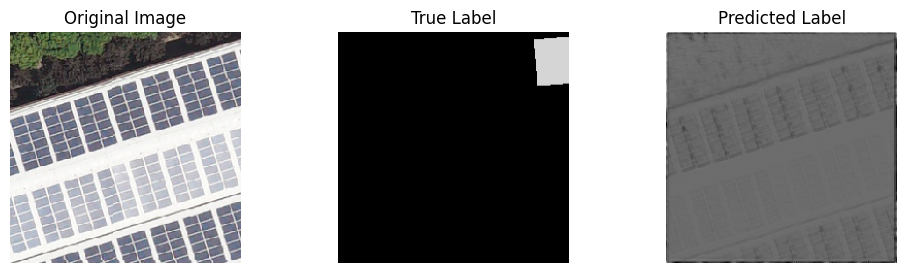

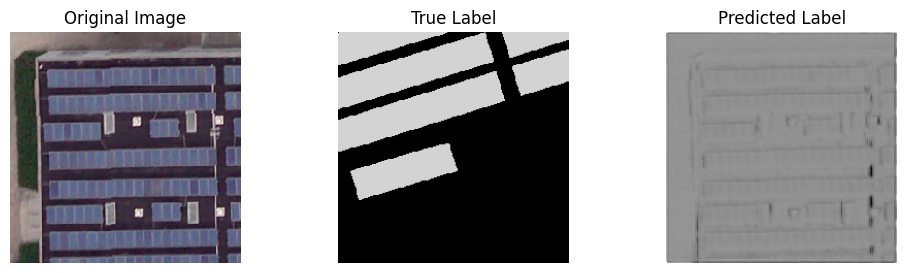

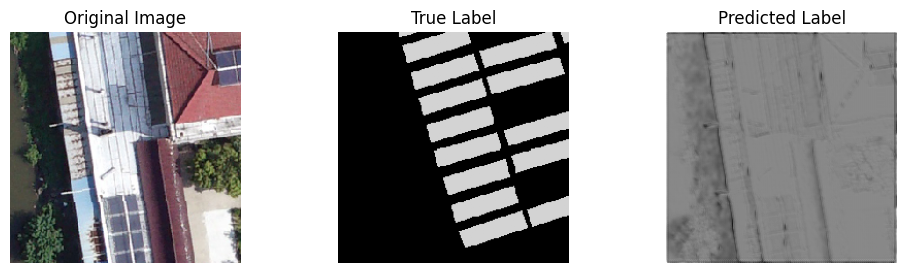

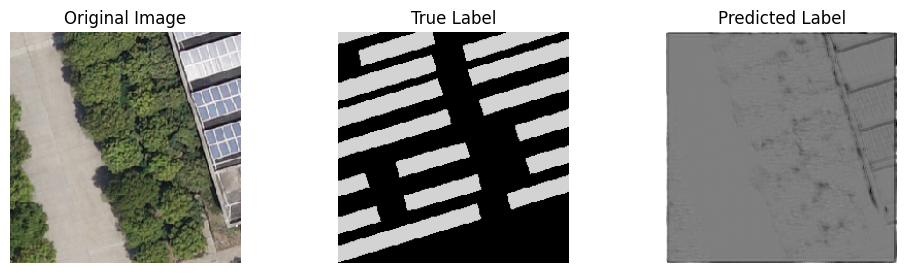

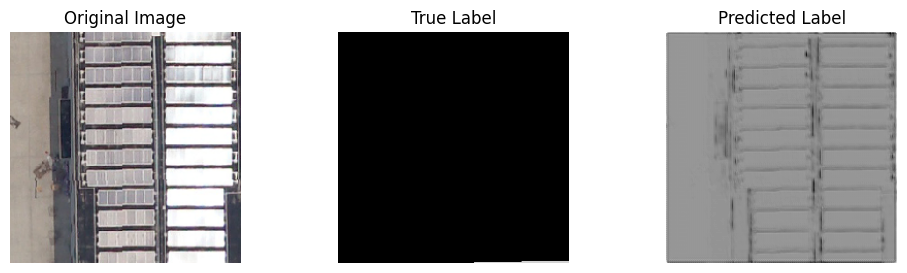

In [33]:
import matplotlib.pyplot as plt

test_sample_images = test_images[:5]
test_sample_labels = test_labels[:5]

predicted_labels = model.predict(test_sample_images)

for i in range(len(test_sample_images)):
    plt.figure(figsize=(12, 3))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(test_sample_images[i])
    plt.title("Original Image")
    plt.axis('off')

    # Display true label (mask)
    plt.subplot(1, 3, 2)
    plt.imshow(test_sample_labels[i].squeeze(), cmap='gray')
    plt.title("True Label")
    plt.axis('off')

    # Display predicted label (mask)
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_labels[i].squeeze(), cmap='gray')
    plt.title("Predicted Label")
    plt.axis('off')

    plt.show()


# Model Evaluation
**Predictions:** The model generates predictions for the test dataset. These predictions are the model's output probabilities indicating the presence of a solar panel in each pixel (for image segmentation tasks).

**Shape Verification:** The shapes of the predictions and the true labels are printed to verify consistency, crucial for accurate metric calculation.

**Flattening:** Both predictions and true labels are flattened to convert the 2D image data into 1D arrays, simplifying the process of comparing each predicted value against its corresponding true label.

**Binary Conversion:** A threshold (0.5) is applied to the prediction probabilities to classify each pixel as either having a solar panel (1) or not (0), converting the probabilities into binary values.

**Metric Calculation:** Precision, recall, F1 score, and Intersection over Union (IoU) metrics are calculated to evaluate the model's performance quantitatively. These metrics provide insight into the model's accuracy, sensitivity, specificity, and the overlap between predicted and actual labels.

In [34]:
# Get the predictions from the model
predictions = model.predict(test_images)

# Check the shape of the predictions and the true labels
print("Predictions shape:", predictions.shape)
print("True labels shape:", test_labels.shape)

# Flatten the predictions and the true labels
y_pred = predictions.flatten()
y_true = test_labels.flatten()

# Apply a threshold to convert probabilities to binary values
y_pred = (y_pred > 0.5).astype(int)

# Verify that the flattened arrays have the same length
print("Flattened predictions length:", y_pred.shape)
print("Flattened true labels length:", y_true.shape)

# If the lengths match, calculate the metrics
if y_pred.shape == y_true.shape:
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    iou = jaccard_score(y_true, y_pred)

    print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, IoU: {iou}")
else:
    print("The predictions and true labels have different lengths.")


5/5 [==============================] - 0s 74ms/step
Predictions shape: (133, 224, 224, 1)
True labels shape: (133, 224, 224, 3)
Flattened predictions length: (6673408,)
Flattened true labels length: (20020224,)
The predictions and true labels have different lengths.


In [35]:
from tensorflow.keras.optimizers import Adam

# trying a different learning rate
new_learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=new_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])


In [36]:
data_gen_args = {
    'rotation_range': 10,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'shear_range': 0.1,
    'zoom_range': 0.1,
    'horizontal_flip': True,
    'vertical_flip': True,  # New augmentation
    'brightness_range': [0.8, 1.2],  # New augmentation
    'fill_mode': 'nearest'
}

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit methods
image_datagen.fit(train_images, augment=True, seed=seed)
mask_datagen.fit(train_labels, augment=True, seed=seed)


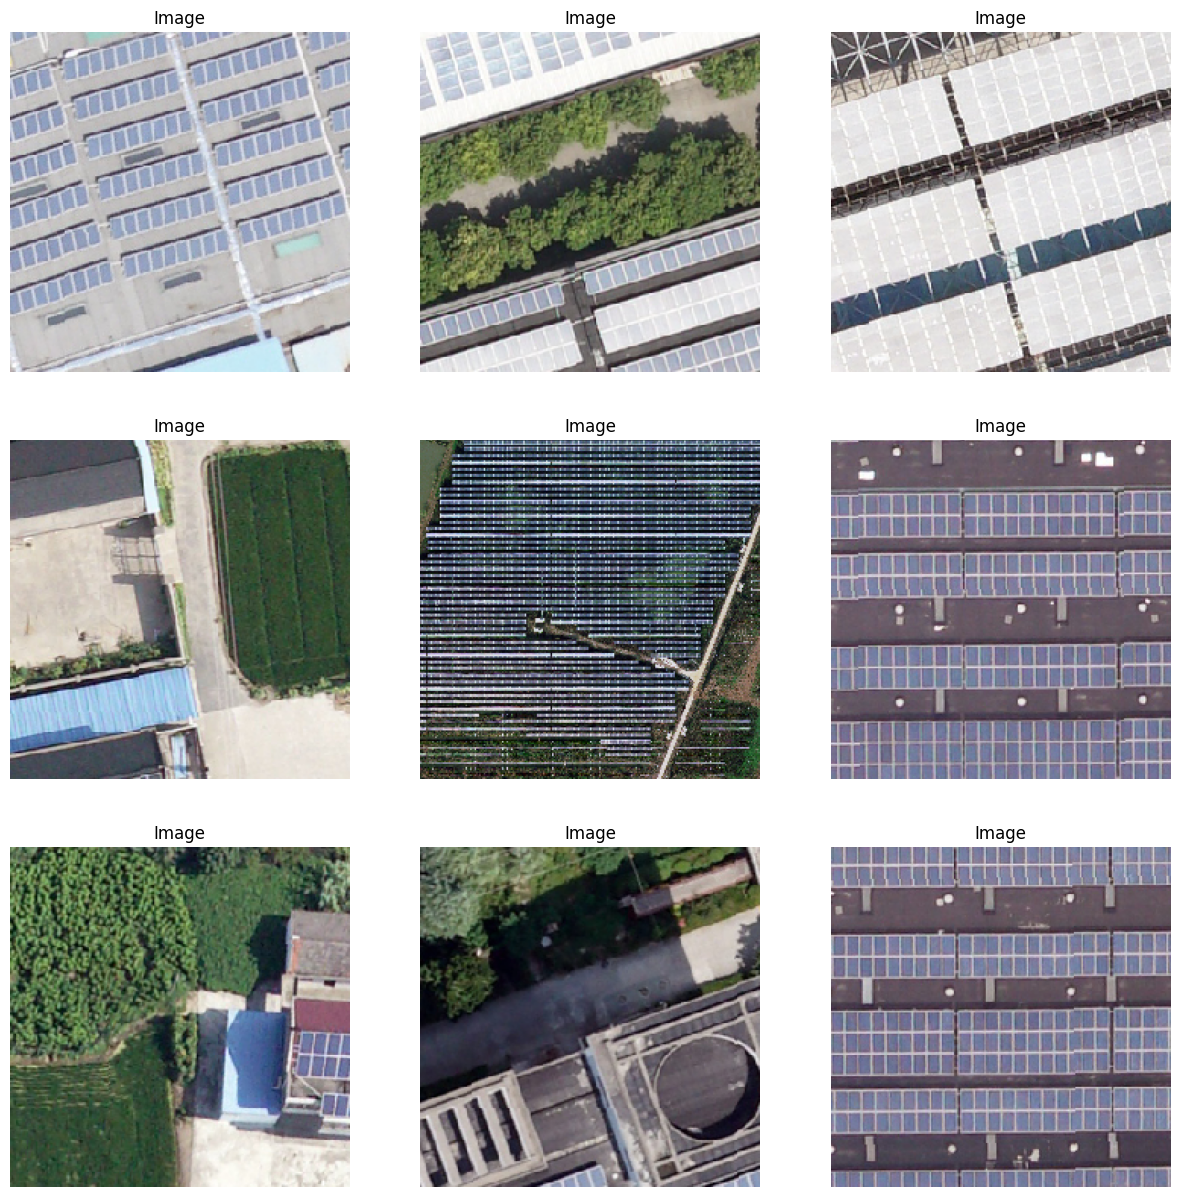

In [37]:
import matplotlib.pyplot as plt

# Assuming 'train_images' is your dataset of images
def plot_image_samples(images, titles, rows=3, cols=3, figsize=(15, 15)):
    plt.figure(figsize=figsize)
    for i in range(1, cols * rows + 1):
        plt.subplot(rows, cols, i)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Plotting a sample of images
plot_image_samples(train_images, titles=["Image" for _ in train_images])


# Model Tuning and Augmentation Enhancement
**Learning Rate Adjustment:** The learning rate for the model's optimizer (Adam) is adjusted to explore its impact on training effectiveness. A lower learning rate (0.0001) is specified to potentially improve training stability and performance.

**Data Augmentation:** The data augmentation parameters are expanded to include vertical flips and brightness range adjustments, introducing more variability into the training process. This aims to further enhance the model's ability to generalize from the training data to unseen images.

In [38]:
from tensorflow.keras.optimizers import Adam

# trying different learning rates
learning_rates = [0.01, 0.001, 0.0001]
for lr in learning_rates:
    model = unet_model()
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    # Train your model
    history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(val_images, val_labels))

    # save the training history for later analysis
    print(f"Training with learning rate: {lr}")
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/10
16/16 [==============================] - 26s 818ms/step - loss: 1196.0886 - accuracy: 0.5764 - val_loss: 0.5669 - val_accuracy: 0.6974
Epoch 2/10
16/16 [==============================] - 5s 305ms/step - loss: 0.5648 - accuracy: 0.7041 - val_loss: 0.5618 - val_accuracy: 0.6974
Epoch 3/10
16/16 [==============================] - 5s 298ms/step - loss: 0.5609 - accuracy: 0.7039 - val_loss: 0.5638 - val_accuracy: 0.6974
Epoch 4/10
16/16 [==============================] - 5s 293ms/step - loss: 0.5599 - accuracy: 0.7048 - val_loss: 0.5678 - val_accuracy: 0.6974
Epoch 5/10
16/16 [==============================] - 5s 291ms/step - loss: 0.5585 - accuracy: 0.7048 - val_loss: 0.5619 - val_accuracy: 0.6974
Epoch 6/10
16/16 [==============================] - 5s 296ms/step - loss: 0.5575 - accuracy: 0.7048 - val_loss: 0.5617 - val_accuracy: 0.6974
Epoch 7/10
16/16 [==============================] - 5s 290ms/step - loss: 0.5565 - accuracy: 0.7048 - val_loss: 0.5615 - val_accuracy: 0.6974
Ep

# Creating a Simple Dense Model
**Model Definition:** A sequential model is defined using TensorFlow's Keras API, consisting of two dense layers. The first layer has 100 neurons with ReLU activation, suitable for capturing nonlinear relationships in the input data. The second layer is a single neuron with sigmoid activation, outputting a probability indicating the presence or absence of the target feature (solar panel) in the image.

**Input Shape:** The model expects input data in a flattened form, where each image is represented as a 1D array of pixel values.
# Preparing the Data
**Flattening Images:** The training and validation images are flattened, transforming each 2D image into a 1D array. This step is necessary because the simple dense model does not process 2D images directly but rather takes vectors as input.

**Reshaping Labels:** The labels are reshaped by flattening and then determining the majority class (0 or 1) for each image. This approach simplifies the problem to binary classification, where each image is labeled as containing the feature of interest or not, based on the majority of pixel classifications in its corresponding label image.
# Training and Evaluation
**Compilation:** The model is compiled with the Adam optimizer and binary cross-entropy loss function, which are standard choices for binary classification tasks. The accuracy metric is included to monitor the model's performance.

**Training: **The model is trained on the flattened training images and their corresponding binary labels for a fixed number of epochs, using a batch size of 32. Validation data is provided to evaluate the model's performance on unseen data during training.

**Evaluation:** Finally, the model's performance is evaluated on the flattened validation set to obtain the validation loss and accuracy, providing insights into how well the model generalizes.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

def simple_model(input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    return model


# Flatten the images for the simple dense network
train_images_flat = np.array([img.flatten() for img in train_images])
val_images_flat = np.array([img.flatten() for img in val_images])

# Function to reshape labels for binary classification
def reshape_labels(labels):
    reshaped = []
    for label in labels:
        # Flatten the label and use the majority class (0 or 1) as the label for the whole image
        majority_class = np.round(np.mean(label))
        reshaped.append(majority_class)
    return np.array(reshaped)

train_labels_flat = reshape_labels(train_labels)
val_labels_flat = reshape_labels(val_labels)

# Create and compile the model
input_shape = (train_images_flat.shape[1],)  # This is the flattened shape
baseline_model = simple_model(input_shape)
baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = baseline_model.fit(
    train_images_flat,
    train_labels_flat,
    batch_size=32,
    epochs=10,
    validation_data=(val_images_flat, val_labels_flat)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = baseline_model.evaluate(val_images_flat, val_labels_flat)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


Epoch 1/10
16/16 [==============================] - 2s 48ms/step - loss: 32.9791 - accuracy: 0.7249 - val_loss: 0.5788 - val_accuracy: 0.8443
Epoch 2/10
16/16 [==============================] - 0s 30ms/step - loss: 1.7649 - accuracy: 0.8032 - val_loss: 0.5403 - val_accuracy: 0.8383
Epoch 3/10
16/16 [==============================] - 0s 25ms/step - loss: 0.8819 - accuracy: 0.8032 - val_loss: 0.8462 - val_accuracy: 0.8443
Epoch 4/10
16/16 [==============================] - 0s 32ms/step - loss: 0.7638 - accuracy: 0.7932 - val_loss: 1.5261 - val_accuracy: 0.8443
Epoch 5/10
16/16 [==============================] - 0s 28ms/step - loss: 0.8399 - accuracy: 0.7972 - val_loss: 1.3953 - val_accuracy: 0.8443
Epoch 6/10
16/16 [==============================] - 1s 36ms/step - loss: 0.6853 - accuracy: 0.8112 - val_loss: 0.9564 - val_accuracy: 0.8443
Epoch 7/10
16/16 [==============================] - 0s 26ms/step - loss: 0.5557 - accuracy: 0.8414 - val_loss: 0.4904 - val_accuracy: 0.8383
Epoch 8/10
1

1/1 [==============================] - 0s 290ms/step


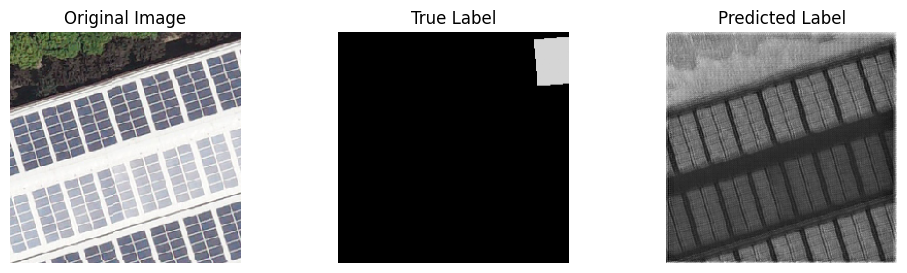

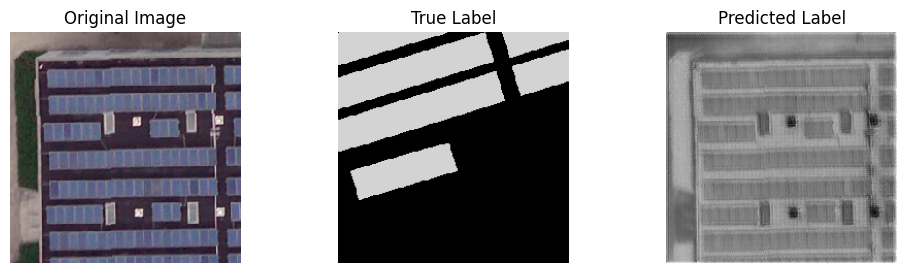

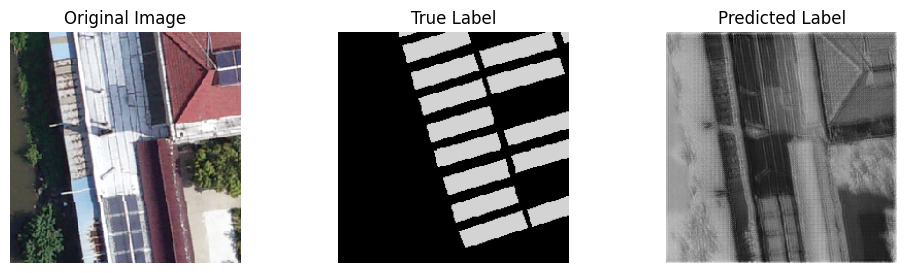

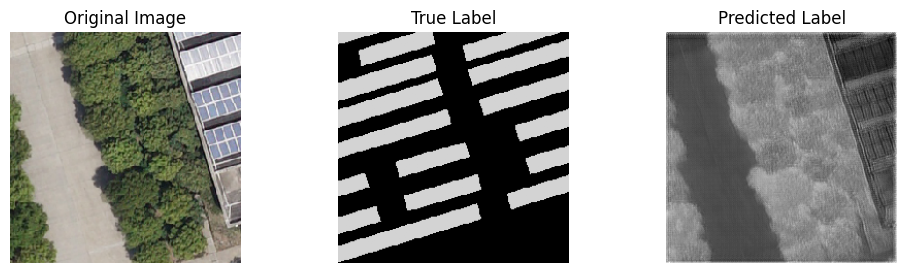

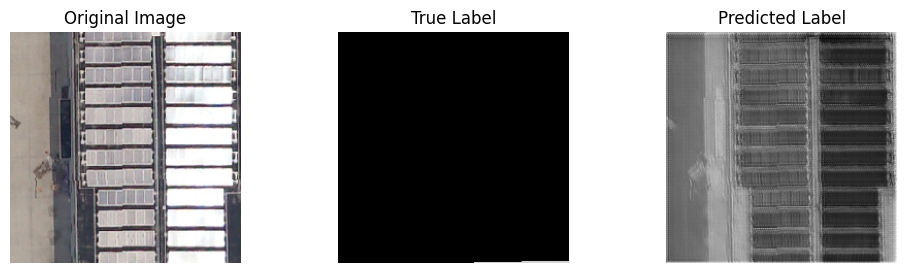

In [40]:
import matplotlib.pyplot as plt

# Select a few images from your test set
test_sample_images = test_images[:5]
test_sample_labels = test_labels[:5]

predicted_labels = model.predict(test_sample_images)

for i in range(len(test_sample_images)):
    plt.figure(figsize=(12, 3))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(test_sample_images[i])
    plt.title("Original Image")
    plt.axis('off')

    # Display true label (mask)
    plt.subplot(1, 3, 2)
    plt.imshow(test_sample_labels[i].squeeze(), cmap='gray')
    plt.title("True Label")
    plt.axis('off')

    # Display predicted label (mask)
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_labels[i].squeeze(), cmap='gray')
    plt.title("Predicted Label")
    plt.axis('off')

    plt.show()


In [41]:
pip install gradio


In [42]:
pip install --upgrade typing_extensions


In [43]:
pip install --upgrade gradio


In [45]:
import sys
print(sys.version)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]




### Gradio Interface Creation for Model Predictions

**Objective**: To facilitate user interaction with the image classification or segmentation model by allowing them to upload images and view the model's predictions in real-time.

**Components**:

- **Gradio Library Import**: The code starts by importing `gradio` (abbreviated as `gr`), along with necessary image processing libraries such as `tensorflow.keras.preprocessing.image` for image array conversion and `PIL.Image` for handling image operations in Python.

- **Preprocessing Function**: `preprocess_image_pil` is defined to perform necessary image preprocessing steps on images uploaded by users. This includes resizing the image to the model's expected input size, converting the image to a NumPy array, and normalizing pixel values to the [0, 1] range, making it suitable for model prediction.

- **Prediction Function**: `predict_image` takes a PIL image as input, preprocesses it using `preprocess_image_pil`, and then feeds the processed image to the model for prediction. The function returns the model's prediction, which can be tailored to the specific task (e.g., classification, segmentation).

- **Gradio Interface**: The `gr.Interface` function creates a web interface for the `predict_image` function. It specifies the input as an image and the output also as an image (or another format depending on the model's output). This setup allows users to upload images directly to the interface and see the model's output displayed.

- **Interface Launch**: Finally, `iface.launch()` is called to start the web server, making the interface accessible through a local web address or optionally hosted online. Users can interact with the model by uploading images and receiving predictions in real-time.

In [48]:
import gradio as gr
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image as PILImage
import numpy as np

In [51]:


def preprocess_image_pil(img, target_size=(224, 224)):
    img = img.resize(target_size)  # Resize the image to the target size
    img_array = img_to_array(img)  # Convert to numpy array
    img_array /= 255.0  # Normalize the image array
    return img_array

def predict_image(img):
    processed_img = preprocess_image_pil(img)
    prediction = model.predict(np.array([processed_img]))[0]
    return prediction

iface = gr.Interface(fn=predict_image, inputs="image", outputs="image")
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bfe8ad6cfa0fa1963a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
